In [2]:
import pandas as pd
import numpy as np

In [4]:
medical_insuance_df = pd.read_csv(r'C:\Users\user\Desktop\medical_insurance\medical_insurance.csv')


In [5]:
medical_insuance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

How does smoking status affect medical charges? It would be interesting to compare the charges for smokers versus non-smokers.

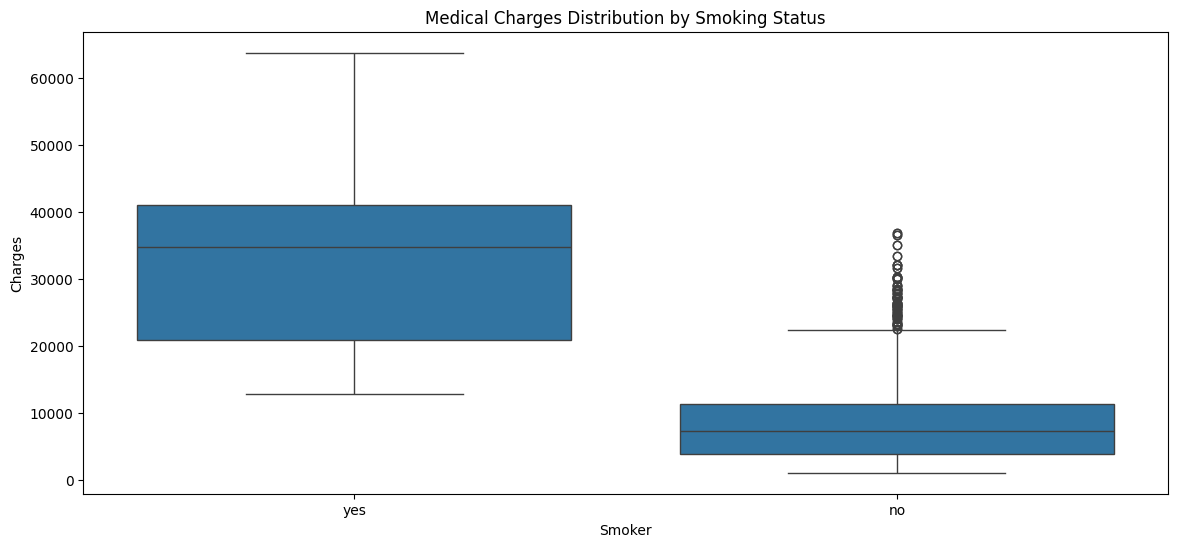

,mean,median
smoker,,
no,8417.874411,7341.4160
yes,32223.139764,34725.8811


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
smoker_charges_stats = medical_insuance_df.groupby('smoker')['charges'].agg(['mean', 'median'])

# Visualizing the distribution of charges for smokers vs. non-smokers
plt.figure(figsize=(14, 6))

# Plotting the distribution
sns.boxplot(x='smoker', y='charges', data=medical_insuance_df)

plt.title('Medical Charges Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.show()

smoker_charges_stats


Is there a correlation between BMI and medical charges? Given the distribution of BMI, it would be insightful to see if higher BMI is associated with higher medical costs.

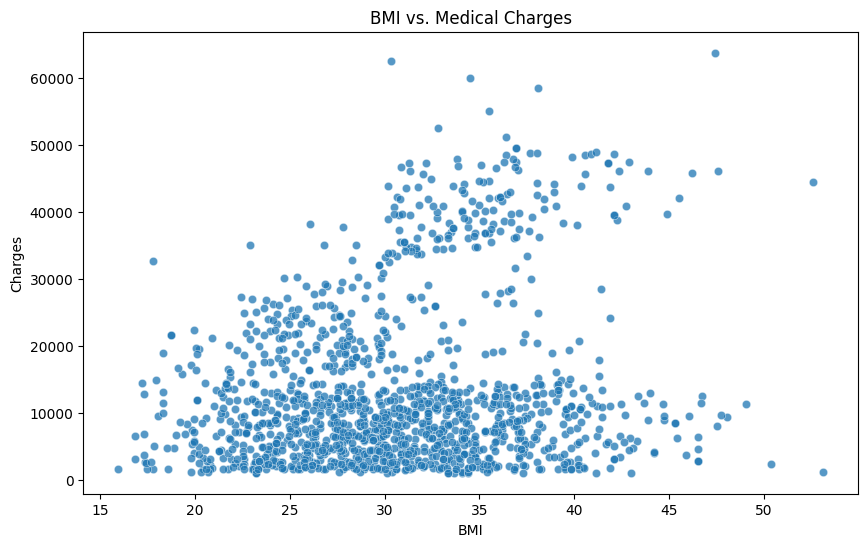

(None, 0.19984604873978876)

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=medical_insuance_df, alpha=0.5)
plt.title('BMI vs. Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Calculating Pearson correlation coefficient
correlation_coefficient = medical_insuance_df['bmi'].corr(medical_insuance_df['charges'])

plt.show(), correlation_coefficient


How do medical charges vary across different regions? This could highlight regional differences in medical costs or the prevalence of certain health conditions.

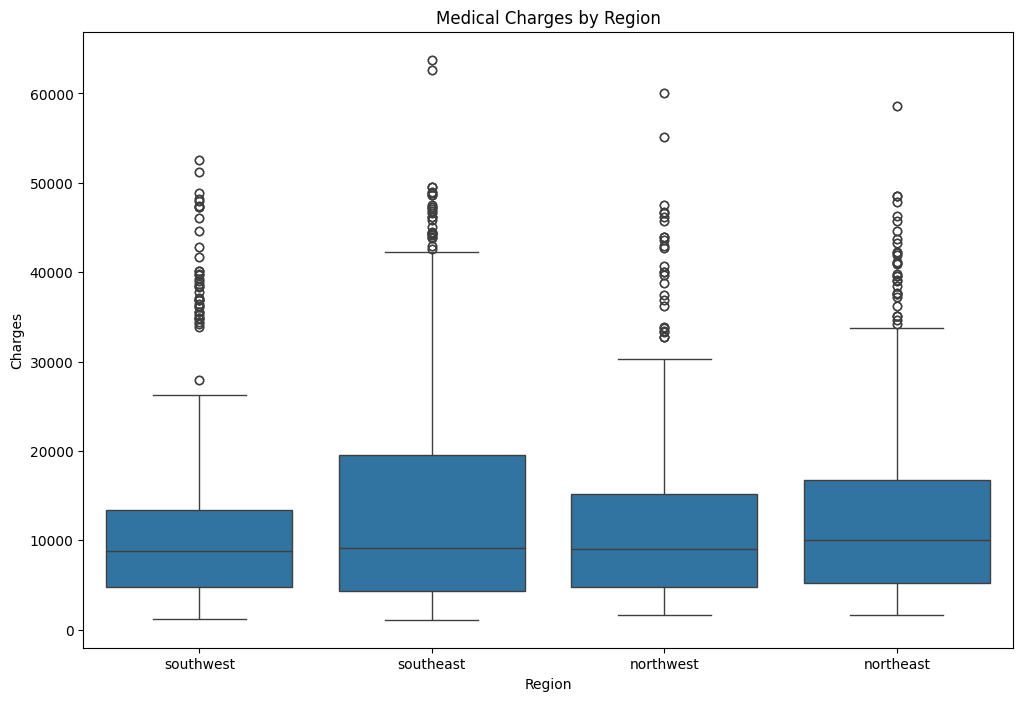

,mean,median
region,,
southeast,14748.777706,9140.95100
northeast,13475.874737,10072.05505
northwest,12463.129315,9081.14720
southwest,12164.196435,8790.53100


In [14]:
# To explore how medical charges vary across different regions, we'll create boxplots to compare the distribution of charges across the four regions: northeast, southeast, southwest, and northwest.

# Boxplot of Charges by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='charges', data=medical_insuance_df)

plt.title('Medical Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')

plt.show()

# Calculating mean and median charges by region
region_charges_stats = medical_insuance_df.groupby('region')['charges'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
region_charges_stats


Does the age of an individual significantly impact medical charges, and how does this interaction change for smokers versus non-smokers?

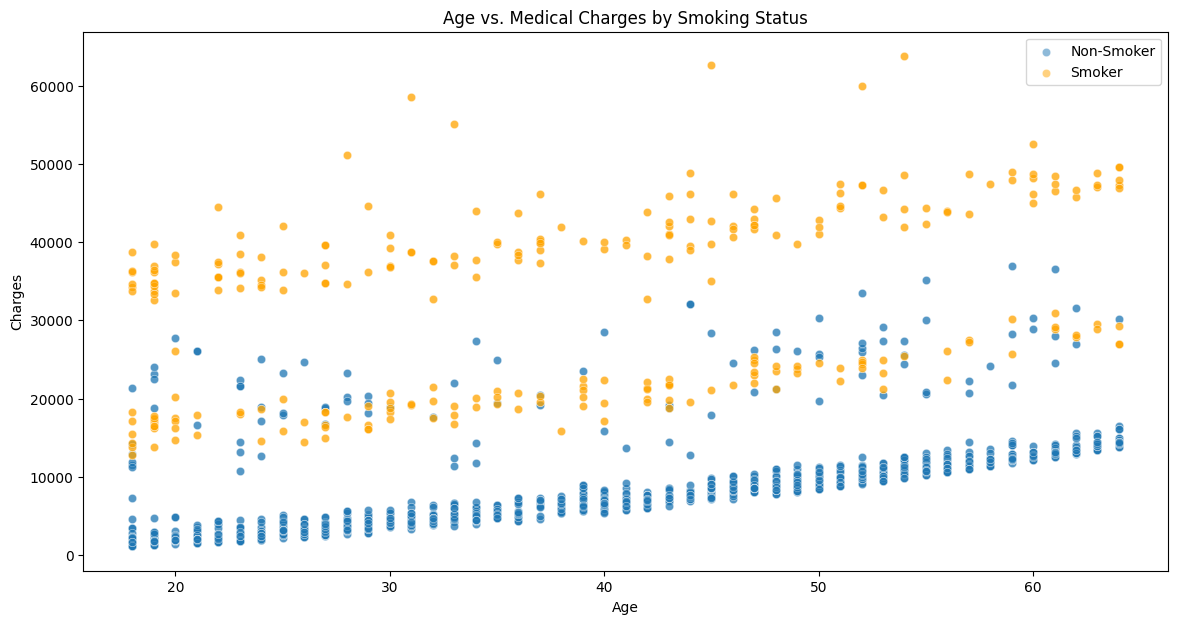

In [15]:
# To explore the impact of age on medical charges and how this interaction changes for smokers versus non-smokers,
# we'll create scatter plots for each group (smokers and non-smokers) with age on the x-axis and charges on the y-axis.

# Scatter plot of Age vs. Charges for Smokers and Non-Smokers
plt.figure(figsize=(14, 7))

# Non-Smokers
sns.scatterplot(x='age', y='charges', data=medical_insuance_df[medical_insuance_df['smoker'] == 'no'], label='Non-Smoker', alpha=0.5)

# Smokers
sns.scatterplot(x='age', y='charges', data=medical_insuance_df[medical_insuance_df['smoker'] == 'yes'], label='Smoker', color='orange', alpha=0.5)

plt.title('Age vs. Medical Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

plt.show()


How does the number of children/dependents affect medical charges? It would be interesting to see if having more dependents is associated with higher insurance costs

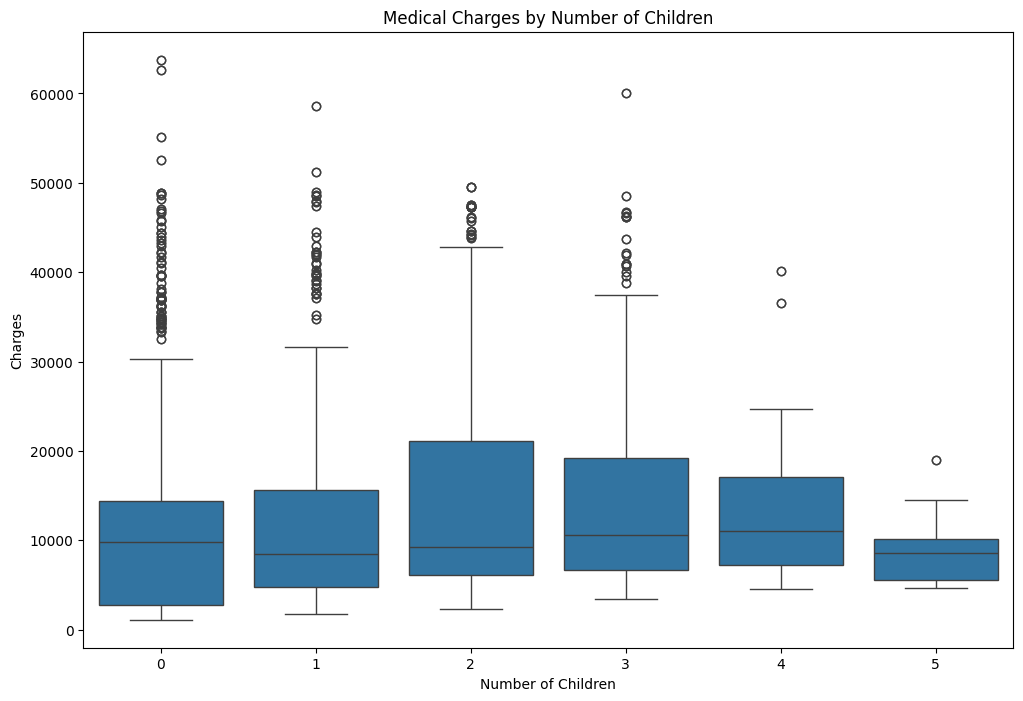

,mean,median
children,,
3,15304.070620,10580.52000
2,15268.182723,9264.97915
4,13550.983876,11024.41820
1,12722.650521,8483.87015
0,12317.920881,9850.43200
5,8706.036629,8596.82780


In [16]:
# To explore the impact of the number of children/dependents on medical charges, we'll create a series of boxplots to compare the distribution of charges across different numbers of children.

# Boxplot of Charges by Number of Children
plt.figure(figsize=(12, 8))
sns.boxplot(x='children', y='charges', data=medical_insuance_df)

plt.title('Medical Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.show()

# Calculating mean and median charges by number of children
children_charges_stats = medical_insuance_df.groupby('children')['charges'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
children_charges_stats


Distribution of ages in the dataset.
Distribution of BMI to see the general healthiness in terms of BMI of the insured population.
Number of children covered by health insurance policies.
Charges distribution to understand how much is being spent on medical insurance.

C:\Users\user\AppData\Local\Temp\ipykernel_3460\3229117812.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(medical_insuance_df['children'], ax=axes[1, 0], palette='Set2')


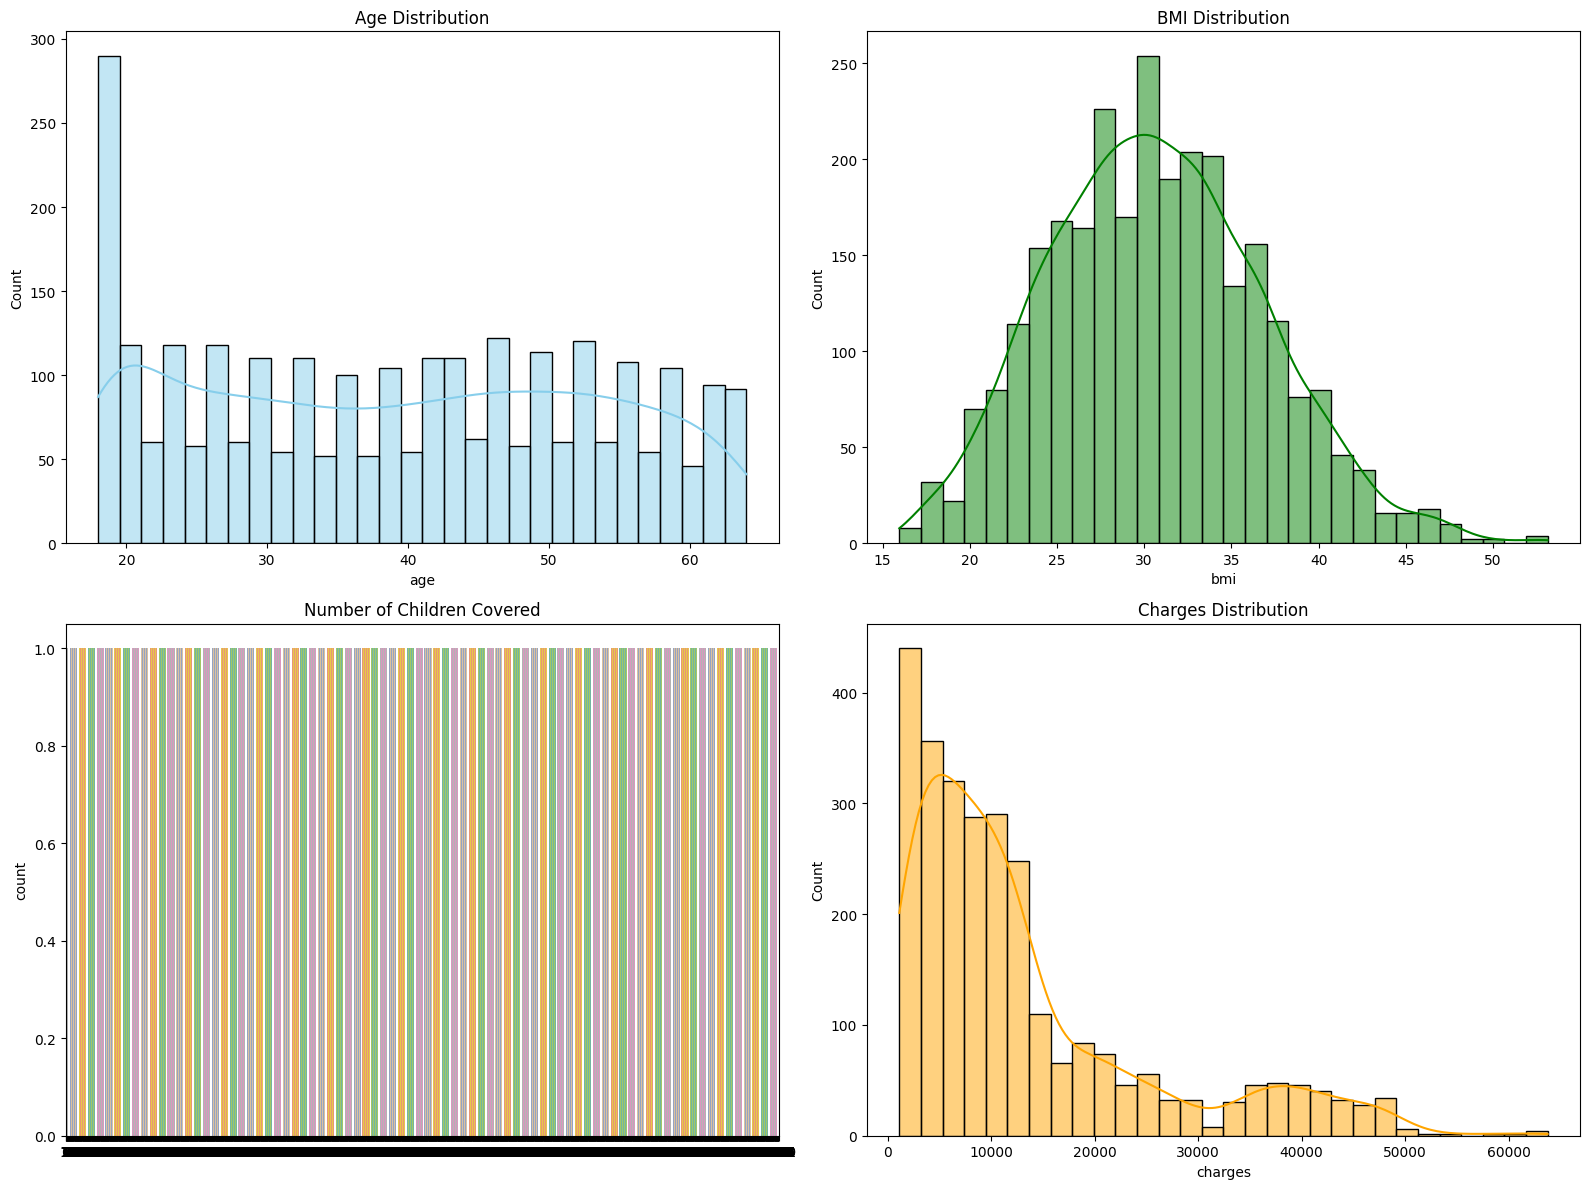

In [18]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of ages
sns.histplot(medical_insuance_df['age'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')

# Distribution of BMI
sns.histplot(medical_insuance_df['bmi'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('BMI Distribution')

# Number of children
sns.countplot(medical_insuance_df['children'], ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Number of Children Covered')

# Charges distribution
sns.histplot(medical_insuance_df['charges'], bins=30, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Charges Distribution')

plt.tight_layout()
plt.show()
